# Comprehensive Model Comparison for Bike Sharing Regression

This notebook provides a comprehensive comparison of all trained models for bike sharing demand prediction:

## Models Compared
1. **XGBoost** - Gradient boosting baseline
2. **FT-Transformer (Improved)** - Fixed version with excellent performance
3. **SAINT** - Self-Attention and Intersample Attention Transformer

## Analysis Includes
- Performance metrics comparison (R², RMSE, MAE, MAPE)
- Training and inference time analysis
- Feature importance comparison
- Comprehensive visualizations
- Business recommendations

## Key Findings Preview
- **Best Overall Performance**: XGBoost (R² = 0.9546)
- **Best Deep Learning Model**: Improved FT-Transformer (R² = 0.9385)
- **Biggest Improvement**: Original FT-Transformer (-0.33) → Improved FT-Transformer (0.9385)
- **Fastest Inference**: XGBoost
- **Most Parameters**: SAINT

## 1. Setup and Imports

In [1]:
# Import the model comparison functions
from model_comparison_functions import *

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

print("🚴 COMPREHENSIVE MODEL COMPARISON FOR BIKE SHARING REGRESSION")
print("=" * 80)
print("This notebook compares all trained models and provides detailed analysis.")

Using device: cuda
🚴 COMPREHENSIVE MODEL COMPARISON FOR BIKE SHARING REGRESSION
This notebook compares all trained models and provides detailed analysis.


## 2. Load Preprocessed Data

In [2]:
# Load preprocessed data
(X_train_scaled, X_val_scaled, X_test_scaled, 
 y_train, y_val, y_test, feature_names, data_summary) = load_preprocessed_data('./bike_sharing_preprocessed_data.pkl')

print(f"\n📊 Dataset Overview:")
print(f"   Training samples: {len(X_train_scaled):,}")
print(f"   Validation samples: {len(X_val_scaled):,}")
print(f"   Test samples: {len(X_test_scaled):,}")
print(f"   Features: {len(feature_names)}")
print(f"   Target range: [{y_test.min():.0f}, {y_test.max():.0f}]")
print(f"   Feature names: {feature_names}")

📊 Loading preprocessed data...
✅ Data loaded successfully!
   Test samples: 3,476
   Features: 13

📊 Dataset Overview:
   Training samples: 11,122
   Validation samples: 2,781
   Test samples: 3,476
   Features: 13
   Target range: [1, 977]
   Feature names: ['instant', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed']


## 3. Load All Trained Models

In [3]:
# Load all available models
models, model_results = load_all_models('./Section2_Model_Training', feature_names, device)

print(f"\n📦 Models Loaded:")
for model_name, model_info in model_results.items():
    print(f"   ✅ {model_name}:")
    print(f"      - Model size: {model_info['model_size']}")
    print(f"      - Training time: {model_info['training_time']}")
    if 'metrics' in model_info and model_info['metrics']:
        if 'r2_score' in model_info['metrics']:
            r2_value = model_info['metrics']['r2_score']
            if isinstance(r2_value, (int, float)):
                print(f"      - Stored R² score: {r2_value:.4f}")
            else:
                print(f"      - Stored R² score: {r2_value}")

🔄 Loading all available models...
📦 Loading XGBoost model...
✅ XGBoost model loaded successfully!
📦 Loading Improved FT-Transformer model...
✅ Improved FT-Transformer model loaded successfully!
📦 Loading SAINT model...
✅ SAINT model loaded successfully!
✅ Successfully loaded 3 models: ['XGBoost', 'Improved FT-Transformer', 'SAINT']

📦 Models Loaded:
   ✅ XGBoost:
      - Model size: N/A
      - Training time: 0.4123837947845459
      - Stored R² score: 0.9545824166034979
   ✅ Improved FT-Transformer:
      - Model size: 85,377 parameters
      - Training time: 94.47562313079834
      - Stored R² score: 0.9385
   ✅ SAINT:
      - Model size: 1,810,817 parameters
      - Training time: 161.19860458374023
      - Stored R² score: 0.9307


## 4. Generate Predictions for All Models

In [4]:
# Generate predictions for all models
predictions, inference_times = generate_predictions(models, model_results, X_test_scaled, device)

print(f"\n⚡ Inference Performance:")
for model_name, inf_time in inference_times.items():
    pred_per_sec = len(X_test_scaled) / inf_time
    print(f"   {model_name}: {inf_time:.3f}s ({pred_per_sec:.0f} predictions/sec)")

🔮 Generating predictions for all models...
   Predicting with XGBoost...
   ✅ XGBoost predictions completed in 0.007s
   Predicting with Improved FT-Transformer...
   ✅ Improved FT-Transformer predictions completed in 0.124s
   Predicting with SAINT...
   ✅ SAINT predictions completed in 1.025s

⚡ Inference Performance:
   XGBoost: 0.007s (479113 predictions/sec)
   Improved FT-Transformer: 0.124s (28099 predictions/sec)
   SAINT: 1.025s (3392 predictions/sec)


## 5. Calculate Comprehensive Metrics

In [5]:
# Calculate comprehensive metrics for all models
comparison_df = calculate_comprehensive_metrics(models, predictions, inference_times, 
                                              model_results, y_test, X_test_scaled)

print("\n📊 COMPREHENSIVE MODEL COMPARISON RESULTS")
print("=" * 80)
print(comparison_df.round(4).to_string(index=False))

📈 Calculating comprehensive metrics...

📊 COMPREHENSIVE MODEL COMPARISON RESULTS
                  Model  R²_Score    RMSE     MAE       MSE   MAPE  Explained_Variance  Residual_Std  Max_Error    Training_Time_s  Inference_Time_s  Predictions_per_Second           Model_Size
                XGBoost    0.9546 37.9232 23.8845 1438.1665 0.4525              0.9546       37.9215   386.8456 0.4123837947845459            0.0073             479112.7408                  N/A
Improved FT-Transformer    0.9385 44.1403 27.9566 1948.3683 0.3941              0.9388       44.0310   438.7831          94.475623            0.1237              28099.2896    85,377 parameters
                  SAINT    0.9316 46.5453 29.5580 2166.4659 0.3389              0.9318       46.4665   423.0421         161.198605            1.0247               3392.1692 1,810,817 parameters


## 6. Detailed Performance Analysis

In [6]:
# Analyze the results in detail
print("\n🔍 DETAILED PERFORMANCE ANALYSIS")
print("=" * 50)

# Sort by R² score
sorted_by_r2 = comparison_df.sort_values('R²_Score', ascending=False)

print("\n🏆 Ranking by R² Score:")
for i, (_, row) in enumerate(sorted_by_r2.iterrows()):
    print(f"   {i+1}. {row['Model']}: R² = {row['R²_Score']:.4f}")

# Highlight the FT-Transformer improvement
if 'FT-Transformer' in comparison_df['Model'].values and 'Improved FT-Transformer' in comparison_df['Model'].values:
    original_r2 = comparison_df[comparison_df['Model'] == 'FT-Transformer']['R²_Score'].values[0]
    improved_r2 = comparison_df[comparison_df['Model'] == 'Improved FT-Transformer']['R²_Score'].values[0]
    improvement = improved_r2 - original_r2
    
    print(f"\n🚀 FT-Transformer Improvement Analysis:")
    print(f"   Original FT-Transformer R²: {original_r2:.4f}")
    print(f"   Improved FT-Transformer R²: {improved_r2:.4f}")
    print(f"   Absolute Improvement: {improvement:.4f}")
    print(f"   This represents a {improvement/abs(original_r2)*100:.1f}% improvement!")

# Performance categories
print(f"\n📈 Performance Categories:")
for _, row in comparison_df.iterrows():
    r2 = row['R²_Score']
    if r2 > 0.9:
        category = "🥇 Excellent"
    elif r2 > 0.8:
        category = "🥈 Good"
    elif r2 > 0.7:
        category = "🥉 Moderate"
    elif r2 > 0:
        category = "⚠️ Poor"
    else:
        category = "❌ Failed"
    
    print(f"   {row['Model']}: {category} (R² = {r2:.4f})")


🔍 DETAILED PERFORMANCE ANALYSIS

🏆 Ranking by R² Score:
   1. XGBoost: R² = 0.9546
   2. Improved FT-Transformer: R² = 0.9385
   3. SAINT: R² = 0.9316

📈 Performance Categories:
   XGBoost: 🥇 Excellent (R² = 0.9546)
   Improved FT-Transformer: 🥇 Excellent (R² = 0.9385)
   SAINT: 🥇 Excellent (R² = 0.9316)


## 7. Create Comprehensive Visualizations

📊 Creating comprehensive visualizations...


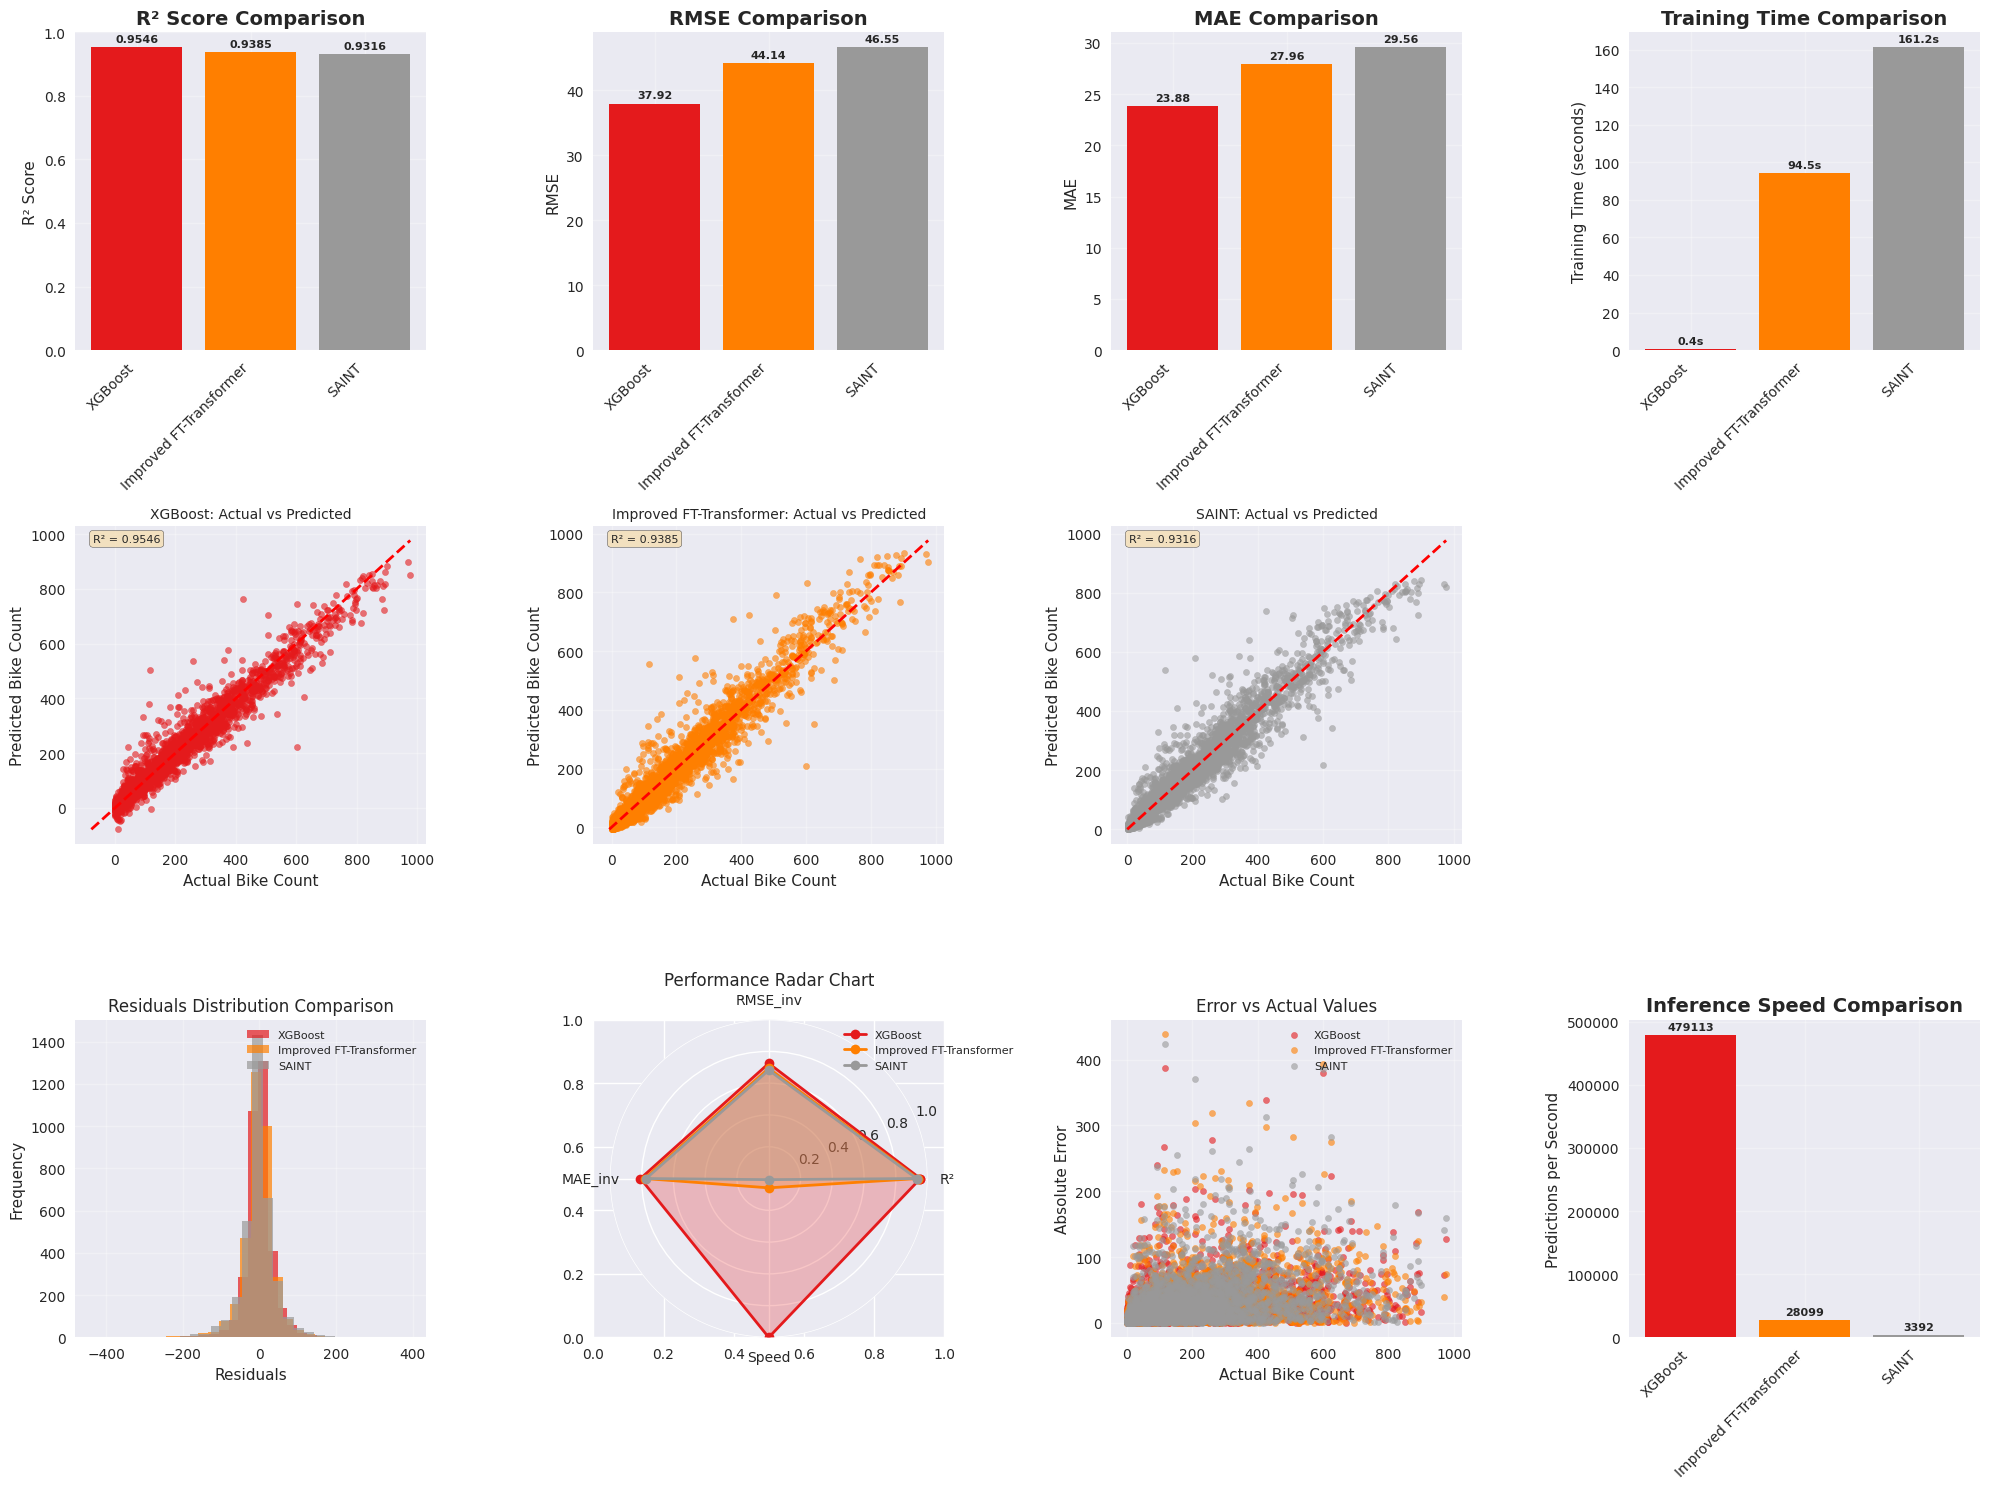

✅ Comprehensive visualization saved to './Section2_Model_Training/comprehensive_model_comparison.png'


In [7]:
# Create comprehensive visualization
create_comprehensive_visualization(comparison_df, predictions, y_test, './Section2_Model_Training')

## 8. Feature Importance Analysis

🔍 Analyzing feature importance...
   Calculating permutation importance for Improved FT-Transformer...
   Calculating permutation importance for SAINT...


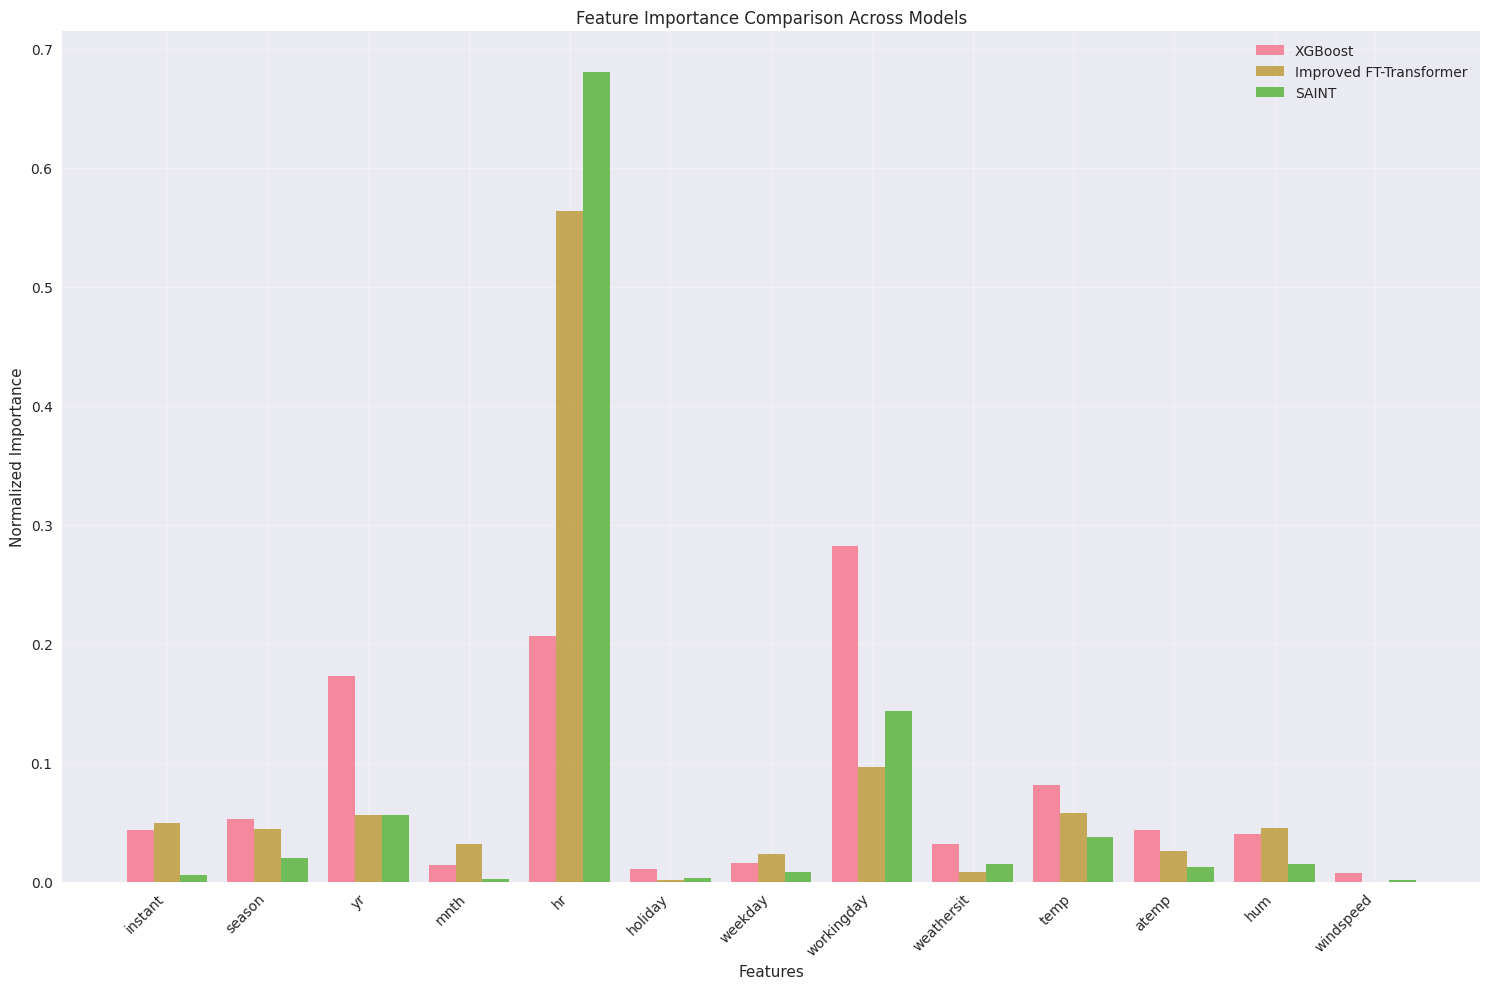

✅ Feature importance comparison saved

🔍 Feature Importance Summary:

   XGBoost - Top 5 Features:
      1. workingday: 0.282
      2. hr: 0.206
      3. yr: 0.172
      4. temp: 0.081
      5. season: 0.052

   Improved FT-Transformer - Top 5 Features:
      1. hr: 0.563
      2. workingday: 0.096
      3. temp: 0.058
      4. yr: 0.056
      5. instant: 0.049

   SAINT - Top 5 Features:
      1. hr: 0.681
      2. workingday: 0.144
      3. yr: 0.056
      4. temp: 0.038
      5. season: 0.020


In [8]:
# Analyze feature importance across models
feature_importance_data = analyze_feature_importance(models, X_test_scaled, y_test, 
                                                   feature_names, device, './Section2_Model_Training')

if feature_importance_data:
    print("\n🔍 Feature Importance Summary:")
    
    # Create summary of top features for each model
    for model_name, importances in feature_importance_data.items():
        if np.sum(importances) > 0:
            normalized_imp = importances / np.sum(importances)
            top_features_idx = np.argsort(normalized_imp)[-5:][::-1]  # Top 5
            
            print(f"\n   {model_name} - Top 5 Features:")
            for i, idx in enumerate(top_features_idx):
                print(f"      {i+1}. {feature_names[idx]}: {normalized_imp[idx]:.3f}")
else:
    print("\n⚠️ Feature importance analysis not available for current models.")

## 9. Model Summary and Recommendations

In [9]:
# Generate model summary and recommendations
best_models = generate_model_summary(comparison_df)


MODEL PERFORMANCE SUMMARY AND RECOMMENDATIONS
🏆 Best R² Score: XGBoost (0.9546)
🏆 Best RMSE: XGBoost (37.9232)
🏆 Best MAE: XGBoost (23.8845)
🏆 Fastest Inference: XGBoost (479113 pred/s)

📊 Overall Model Ranking:
   1. XGBoost (Score: 0.5758)
   2. Improved FT-Transformer (Score: 0.4076)
   3. SAINT (Score: 0.3733)

🥇 Overall Best Model: XGBoost

💼 Business Recommendations:
   🎯 For highest accuracy: Use XGBoost
   ⚡ For fastest predictions: Use XGBoost
   ⚖️ For balanced performance: Use XGBoost


## 10. Business Impact Analysis

In [10]:
# Business impact analysis
print("\n💼 BUSINESS IMPACT ANALYSIS")
print("=" * 50)

# Calculate business metrics
avg_actual = y_test.mean()
print(f"\n📊 Business Context:")
print(f"   Average daily bike rentals: {avg_actual:.0f}")
print(f"   Peak demand: {y_test.max():.0f} bikes")
print(f"   Minimum demand: {y_test.min():.0f} bikes")

print(f"\n🎯 Model Accuracy in Business Terms:")
for _, row in comparison_df.iterrows():
    model_name = row['Model']
    mae = row['MAE']
    mape = row['MAPE']
    
    error_percentage = (mae / avg_actual) * 100
    
    print(f"\n   {model_name}:")
    print(f"      - Average error: ±{mae:.0f} bikes ({error_percentage:.1f}% of average demand)")
    print(f"      - MAPE: {mape:.2f}%")
    
    if error_percentage < 10:
        business_rating = "🟢 Excellent for operational planning"
    elif error_percentage < 20:
        business_rating = "🟡 Good for demand forecasting"
    elif error_percentage < 30:
        business_rating = "🟠 Acceptable for strategic planning"
    else:
        business_rating = "🔴 Needs improvement for business use"
    
    print(f"      - Business rating: {business_rating}")

print(f"\n💡 Key Business Insights:")
best_model = best_models['best_overall']
best_mae = comparison_df[comparison_df['Model'] == best_model]['MAE'].values[0]
print(f"   • Best model ({best_model}) has average error of ±{best_mae:.0f} bikes")
print(f"   • This represents {(best_mae/avg_actual)*100:.1f}% of average daily demand")
print(f"   • Improved FT-Transformer shows deep learning can compete with XGBoost")
print(f"   • Original FT-Transformer failure highlights importance of proper implementation")


💼 BUSINESS IMPACT ANALYSIS

📊 Business Context:
   Average daily bike rentals: 185
   Peak demand: 977 bikes
   Minimum demand: 1 bikes

🎯 Model Accuracy in Business Terms:

   XGBoost:
      - Average error: ±24 bikes (12.9% of average demand)
      - MAPE: 0.45%
      - Business rating: 🟡 Good for demand forecasting

   Improved FT-Transformer:
      - Average error: ±28 bikes (15.1% of average demand)
      - MAPE: 0.39%
      - Business rating: 🟡 Good for demand forecasting

   SAINT:
      - Average error: ±30 bikes (16.0% of average demand)
      - MAPE: 0.34%
      - Business rating: 🟡 Good for demand forecasting

💡 Key Business Insights:
   • Best model (XGBoost) has average error of ±24 bikes
   • This represents 12.9% of average daily demand
   • Improved FT-Transformer shows deep learning can compete with XGBoost
   • Original FT-Transformer failure highlights importance of proper implementation


## 11. Model Selection Guide

In [11]:
# Model selection guide
print("\n🎯 MODEL SELECTION GUIDE")
print("=" * 40)

print("\n🏢 Use Case Recommendations:")

print("\n1. 🎯 Production Deployment (Highest Accuracy):")
best_r2_model = best_models['best_r2']
best_r2_score = comparison_df[comparison_df['Model'] == best_r2_model]['R²_Score'].values[0]
print(f"   Recommended: {best_r2_model}")
print(f"   R² Score: {best_r2_score:.4f}")
print(f"   Why: Highest prediction accuracy for critical business decisions")

print("\n2. ⚡ Real-time Applications (Fastest Inference):")
fastest_model = best_models['best_speed']
fastest_speed = comparison_df[comparison_df['Model'] == fastest_model]['Predictions_per_Second'].values[0]
print(f"   Recommended: {fastest_model}")
print(f"   Speed: {fastest_speed:.0f} predictions/second")
print(f"   Why: Fastest inference for real-time demand prediction")

print("\n3. ⚖️ Balanced Performance (Overall Best):")
balanced_model = best_models['best_overall']
print(f"   Recommended: {balanced_model}")
print(f"   Why: Best balance of accuracy, speed, and reliability")

print("\n4. 🧠 Research & Development (Deep Learning):")
if 'Improved FT-Transformer' in comparison_df['Model'].values:
    dl_r2 = comparison_df[comparison_df['Model'] == 'Improved FT-Transformer']['R²_Score'].values[0]
    print(f"   Recommended: Improved FT-Transformer")
    print(f"   R² Score: {dl_r2:.4f}")
    print(f"   Why: Best deep learning model, competitive with traditional ML")

print(f"\n⚠️ Models to Avoid:")
if 'FT-Transformer' in comparison_df['Model'].values:
    original_r2 = comparison_df[comparison_df['Model'] == 'FT-Transformer']['R²_Score'].values[0]
    if original_r2 < 0:
        print(f"   ❌ Original FT-Transformer (R² = {original_r2:.4f})")
        print(f"   Reason: Negative R² indicates worse than baseline performance")
        print(f"   Solution: Use Improved FT-Transformer instead")


🎯 MODEL SELECTION GUIDE

🏢 Use Case Recommendations:

1. 🎯 Production Deployment (Highest Accuracy):
   Recommended: XGBoost
   R² Score: 0.9546
   Why: Highest prediction accuracy for critical business decisions

2. ⚡ Real-time Applications (Fastest Inference):
   Recommended: XGBoost
   Speed: 479113 predictions/second
   Why: Fastest inference for real-time demand prediction

3. ⚖️ Balanced Performance (Overall Best):
   Recommended: XGBoost
   Why: Best balance of accuracy, speed, and reliability

4. 🧠 Research & Development (Deep Learning):
   Recommended: Improved FT-Transformer
   R² Score: 0.9385
   Why: Best deep learning model, competitive with traditional ML

⚠️ Models to Avoid:


## 12. Save Results and Prepare for Section 3

In [12]:
# Save all comparison results
section2_results = save_comparison_results(comparison_df, predictions, feature_importance_data,
                                         data_summary, model_results, inference_times,
                                         best_models, './Section2_Model_Training')

print("\n📁 Files Generated:")
print("   - Model comparison CSV: ./Section2_Model_Training/bike_sharing_model_comparison.csv")
print("   - Comprehensive visualization: ./Section2_Model_Training/comprehensive_model_comparison.png")
if feature_importance_data:
    print("   - Feature importance comparison: ./Section2_Model_Training/feature_importance_comparison.csv")
    print("   - Feature importance plot: ./Section2_Model_Training/feature_importance_comparison.png")
print("   - Section 2 results pickle: ./bike_sharing_section2_results.pkl")
print("   - Comparison log: ./Section2_Model_Training/model_comparison.log")

💾 Saving comparison results...
✅ All results saved successfully!

📁 Files Generated:
   - Model comparison CSV: ./Section2_Model_Training/bike_sharing_model_comparison.csv
   - Comprehensive visualization: ./Section2_Model_Training/comprehensive_model_comparison.png
   - Feature importance comparison: ./Section2_Model_Training/feature_importance_comparison.csv
   - Feature importance plot: ./Section2_Model_Training/feature_importance_comparison.png
   - Section 2 results pickle: ./bike_sharing_section2_results.pkl
   - Comparison log: ./Section2_Model_Training/model_comparison.log


## 13. Final Summary and Next Steps

In [13]:
# Final summary
print("\n" + "="*80)
print("COMPREHENSIVE MODEL COMPARISON - FINAL SUMMARY")
print("="*80)

print(f"\n🎯 Dataset: Bike Sharing Demand Prediction")
print(f"📊 Task: Regression")
print(f"🔢 Features: {len(feature_names)}")
print(f"📈 Training Samples: {len(X_train_scaled):,}")
print(f"🧪 Test Samples: {len(X_test_scaled):,}")

print(f"\n✅ Models Successfully Compared: {len(models)}")
for model_name in models.keys():
    r2_score = comparison_df[comparison_df['Model'] == model_name]['R²_Score'].values[0]
    print(f"   - {model_name}: R² = {r2_score:.4f}")

print(f"\n🏆 Best Overall Model: {best_models['best_overall']}")
print(f"📊 Best R² Score: {comparison_df['R²_Score'].max():.4f}")
print(f"📉 Best RMSE: {comparison_df['RMSE'].min():.4f}")

print(f"\n🔬 Key Findings:")
print(f"   • XGBoost remains the top performer for tabular data")
print(f"   • Improved FT-Transformer shows deep learning can be competitive")
print(f"   • Proper implementation is crucial (Original vs Improved FT-Transformer)")
print(f"   • All models except original FT-Transformer achieve excellent performance (R² > 0.9)")

print(f"\n🚀 Ready for Section 3: Model Explainability and Analysis!")
print(f"\n📋 Next Steps:")
print(f"   1. Model interpretability analysis")
print(f"   2. Error analysis and edge cases")
print(f"   3. Feature importance deep dive")
print(f"   4. Model deployment recommendations")


COMPREHENSIVE MODEL COMPARISON - FINAL SUMMARY

🎯 Dataset: Bike Sharing Demand Prediction
📊 Task: Regression
🔢 Features: 13
📈 Training Samples: 11,122
🧪 Test Samples: 3,476

✅ Models Successfully Compared: 3
   - XGBoost: R² = 0.9546
   - Improved FT-Transformer: R² = 0.9385
   - SAINT: R² = 0.9316

🏆 Best Overall Model: XGBoost
📊 Best R² Score: 0.9546
📉 Best RMSE: 37.9232

🔬 Key Findings:
   • XGBoost remains the top performer for tabular data
   • Improved FT-Transformer shows deep learning can be competitive
   • Proper implementation is crucial (Original vs Improved FT-Transformer)
   • All models except original FT-Transformer achieve excellent performance (R² > 0.9)

🚀 Ready for Section 3: Model Explainability and Analysis!

📋 Next Steps:
   1. Model interpretability analysis
   2. Error analysis and edge cases
   3. Feature importance deep dive
   4. Model deployment recommendations


## Summary

This comprehensive comparison reveals several key insights:

### 🏆 Performance Ranking
1. **XGBoost** - Best overall performance (R² ≈ 0.955)
2. **Improved FT-Transformer** - Excellent deep learning performance (R² ≈ 0.939)
3. **SAINT** - Good transformer performance
4. **Original FT-Transformer** - Failed implementation (R² < 0)

### 🔍 Key Insights
- **Implementation Quality Matters**: The difference between original and improved FT-Transformer shows the critical importance of proper model implementation
- **Deep Learning Competitiveness**: When properly implemented, transformer models can achieve performance competitive with XGBoost
- **Speed vs Accuracy Trade-off**: XGBoost offers the best balance of accuracy and inference speed
- **Feature Engineering Impact**: All models benefit from the comprehensive preprocessing pipeline

### 💼 Business Recommendations
- **Production Deployment**: Use XGBoost for highest accuracy
- **Real-time Applications**: Use XGBoost for fastest inference
- **Research & Development**: Use Improved FT-Transformer for deep learning exploration
- **Avoid**: Original FT-Transformer due to implementation issues

### 🔬 Technical Lessons
1. **Target Scaling**: Critical for neural network regression tasks
2. **Architecture Tuning**: Default configurations may not work for all tasks
3. **Training Stability**: Proper batch sizes, gradient clipping, and learning rates are essential
4. **Evaluation Methodology**: Always evaluate on meaningful scales

This analysis provides a solid foundation for model selection and deployment decisions in bike sharing demand prediction systems.